# Machine Learning for Absolute Beginners
## K-Means Clustering

### 0. Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


from sklearn.cluster import KMeans

### 1. Load Dataset

In [2]:
df = pd.read_csv("data/mallcustomers.csv")

In [3]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


- **Income:** $K Dollars
- **Score:** Index (0-100) how much the customer spends 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### Note: There is no obvious correlation between Income and Score

<AxesSubplot:xlabel='Income', ylabel='Score'>

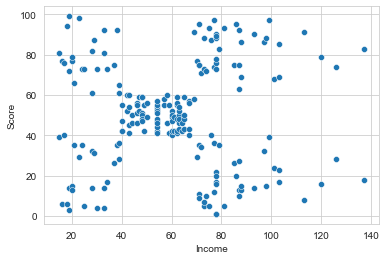

In [5]:
sns.scatterplot(data=df,x="Income",y="Score")

## 2. Apply KMeans Clustering

We will only use a subset of the data

In [6]:
# X will be a subset of the data
X = df[['Score','Income']]

In [7]:
# We are asking the algorithm to identify 5 clusters or groups
km = KMeans(n_clusters=5, random_state=0).fit(X)

In [8]:
# retrieve the results in the form of an array
results = km.predict(X)

In [9]:
# look at sample results
results[0:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3], dtype=int32)

## 3. Visualize the Results

In [10]:
# create a dataframe for the clusters
clusters = pd.DataFrame(results,columns=['cluster'])

In [11]:
clusters.head()

,cluster
0,4
1,3
2,4
3,3
4,4


In [12]:
# create a new dataframe which joins the cluster to X
df_c = X.join(clusters, how='outer')

In [13]:
df_c.head()

,Score,Income,cluster
0,39,15,4
1,81,15,3
2,6,16,4
3,77,16,3
4,40,17,4


<AxesSubplot:xlabel='Income', ylabel='Score'>

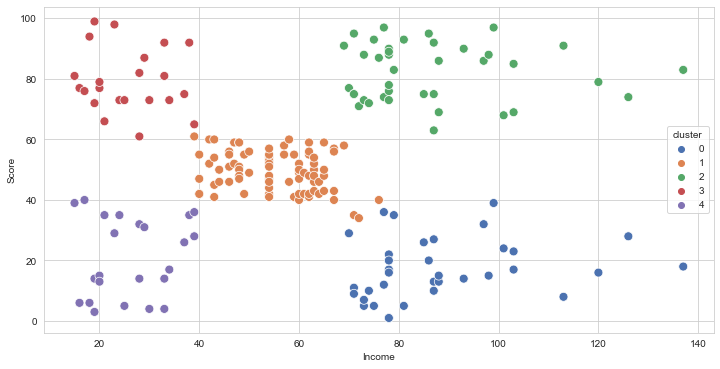

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cluster",
                palette="deep",s=80)

## 4. Interpret the Results

In [15]:
category = {0:'Conservative', 1:'Middle-of-the-Road', 
            2:'Luxury', 3:'Enthusiastic',4:'Browsers'}

In [16]:
df_c['cat'] = df_c['cluster']

In [17]:
df_c = df_c.replace({'cat':category})

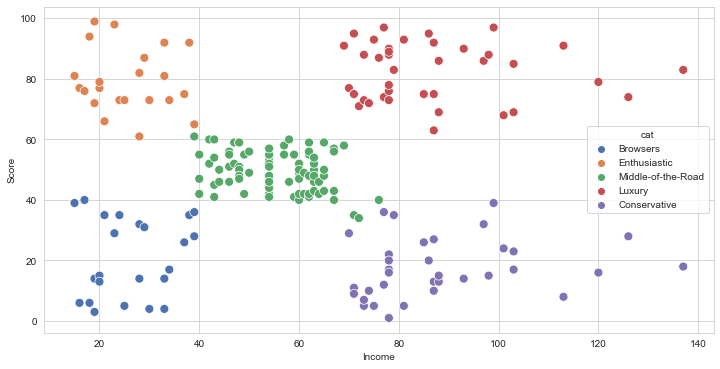

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cat",
                palette="deep", s=80)
plt.savefig("kmeansscatter.pdf")

## 5. Marketing Action Plan

- Luxury: Concierge and valet services 
- Enthusiastic: Discount programs
- Conservative: Further investigation - which ones are similar to luxury